# Decision Trees and Random Forests

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('kyphosis.csv')
df.head()

Kyphosis  Age  Number  Start
0   absent   71       3      5
1   absent  158       3     14
2  present  128       4      5
3   absent    2       5      1
4   absent    1       4     15

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


## EDA

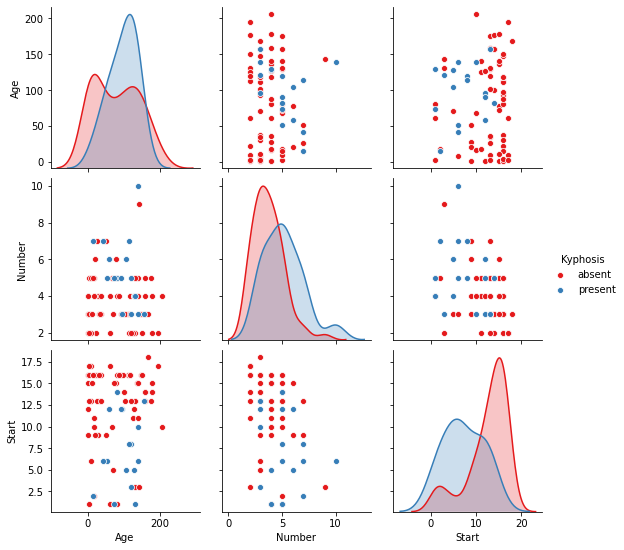

In [5]:
sns.pairplot(df,hue = 'Kyphosis',palette='Set1')

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30)

## Decision Trees

In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
dtree = DecisionTreeClassifier()

In [12]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

## Prediction and Evaluation

In [14]:
y_pred = dtree.predict(X_test)

In [15]:
from sklearn.metrics import classification_report,confusion_matrix

In [16]:
cnf_matrix = confusion_matrix(y_test,y_pred)
print(cnf_matrix)

[[16  3]
 [ 4  2]]


Text(0.5, 15.0, 'Predicted Label')

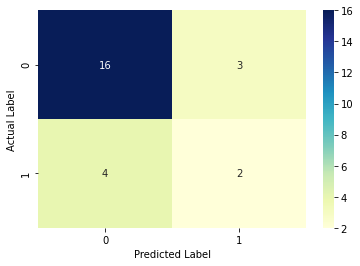

In [17]:
sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu",fmt='d')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

In [18]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      absent       0.80      0.84      0.82        19
     present       0.40      0.33      0.36         6

    accuracy                           0.72        25
   macro avg       0.60      0.59      0.59        25
weighted avg       0.70      0.72      0.71        25



In [19]:
from sklearn import tree

In [20]:
features = list(df.columns[1:])
targets = ["absent","present"]
print(features)
print(targets)

['Age', 'Number', 'Start']
['absent', 'present']


In [21]:
y.value_counts()

absent     64
present    17
Name: Kyphosis, dtype: int64

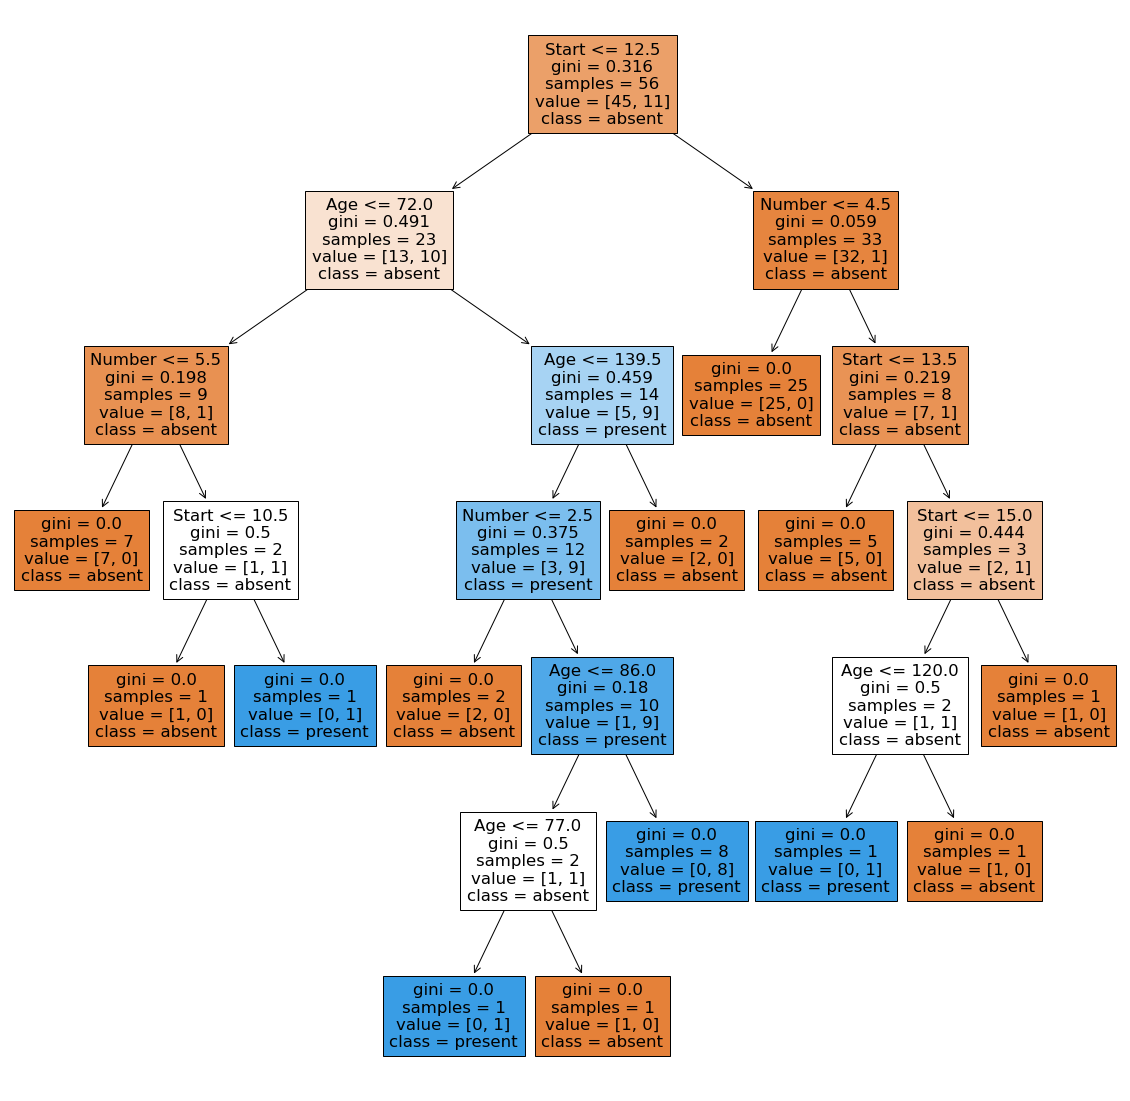

In [22]:
plt.figure(figsize=(20,20))
tree2 = tree.plot_tree(dtree,filled=True,feature_names=features ,class_names = targets)

## Random Forests

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
model = RandomForestClassifier(n_estimators = 100)

In [26]:
model.fit(X_train,y_train)

RandomForestClassifier()

In [27]:
y_pred = model.predict(X_test)

In [28]:
y_pred

array(['absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'present', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'present', 'absent', 'absent',
       'absent', 'absent', 'present', 'absent', 'absent', 'present',
       'absent'], dtype=object)

In [29]:
cnf_matrix = confusion_matrix(y_test,y_pred)

In [30]:
cnf_matrix

array([[17,  2],
       [ 4,  2]])

Text(0.5, 15.0, 'Predicted Label')

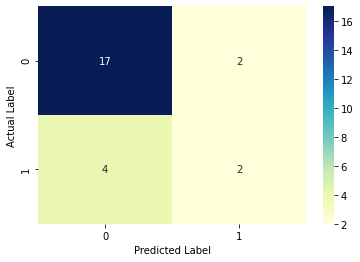

In [31]:
sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu",fmt='d')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

In [32]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      absent       0.81      0.89      0.85        19
     present       0.50      0.33      0.40         6

    accuracy                           0.76        25
   macro avg       0.65      0.61      0.62        25
weighted avg       0.74      0.76      0.74        25



In [36]:
fn=features
cn=targets
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,20), dpi=800)
tree.plot_tree(model.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('rf.png')